In [1]:
cd drive/My\ Drive/concrete_crack

/content/drive/My Drive/concrete_crack


In [2]:
!pip install --upgrade tensorflow==1.14

     |████████████████████████████████| 109.2MB 48kB/s 
     |████████████████████████████████| 491kB 41.7MB/s 
     |████████████████████████████████| 3.2MB 45.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [0]:
#!git clone https://github.com/danielenricocahall/One-Class-NeuralNetwork.git

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cd One-Class-NeuralNetwork/

/content/drive/My Drive/concrete_crack/One-Class-NeuralNetwork


In [0]:
from sklearn.decomposition import PCA

In [0]:
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, classification_report
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
from ocnn import OneClassNeuralNetwork

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [9]:
cd ..

/content/drive/My Drive/concrete_crack


In [10]:
cd data_64/

/content/drive/My Drive/concrete_crack/data_64


In [11]:
ls

rescaled_negative_data.npy  X_test_positive_balanced.npy
rescaled_positive_data.npy  X_test_positive_imbalanced.npy
X_test_balanced.npy         X_train_encoded.npy
X_test_imbalanced.npy       X_train.npy
X_test_negative.npy


In [0]:
X_train = np.load('X_train_encoded.npy', allow_pickle=True)

In [13]:
cd ..

/content/drive/My Drive/concrete_crack


In [14]:
cd encoded_decoded_data_64/

/content/drive/My Drive/concrete_crack/encoded_decoded_data_64


In [15]:
ls

balanced/      dec2_i_64.npy  dec4_i_28.npy  enc2_b_64.npy  enc4_b_64.npy
dec1_b_64.npy  dec3_b_64.npy  dec4_i_64.npy  enc2_i_64.npy  enc4_i_28.npy
dec1_i_64.npy  dec3_i_64.npy  enc1_b_64.npy  enc3_b_64.npy  enc4_i_64.npy
dec2_b_64.npy  dec4_b_64.npy  enc1_i_64.npy  enc3_i_64.npy  imbalanced/


In [0]:
X_val_balanced = np.load('enc4_b_64.npy', allow_pickle=True)
X_val_imbalanced = np.load('enc4_i_64.npy', allow_pickle=True)

In [17]:
X_train.shape

(16000, 128)

In [18]:
X_val_balanced.shape

(8000, 128)

In [19]:
X_val_imbalanced.shape

(4500, 128)

In [0]:
scaler = StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_balanced_scaled = scaler.fit_transform(X_val_balanced)
X_val_imbalanced_scaled = scaler.fit_transform(X_val_imbalanced)

In [22]:
cd ..

/content/drive/My Drive/concrete_crack


In [23]:
cd ocnn_model/

/content/drive/My Drive/concrete_crack/ocnn_model


In [0]:
num_features = X_train_scaled.shape[1]
num_hidden = 32
r = 1.0
epochs = 1000
nu_balanced = 4000/8000
nu_imbalanced = 500/4500

In [0]:
oc_nn = OneClassNeuralNetwork(num_features, num_hidden, r)

In [26]:
model_balanced, history_balanced = oc_nn.train_model(X_train_scaled, epochs = epochs, nu = nu_balanced)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1000
1/1 [==============================] - 0s 112ms/step - loss: 28.1989 - r: 1.0000 - quantile_loss: 1.0676
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 28.0279 - r: 1.0000 - quantile_loss: 0.8966
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 27.8630 - r: 1.0000 - quantile_loss: 0.7318
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 27.7837 - r: 1.0000 - quantile_loss: 0.6525
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss:

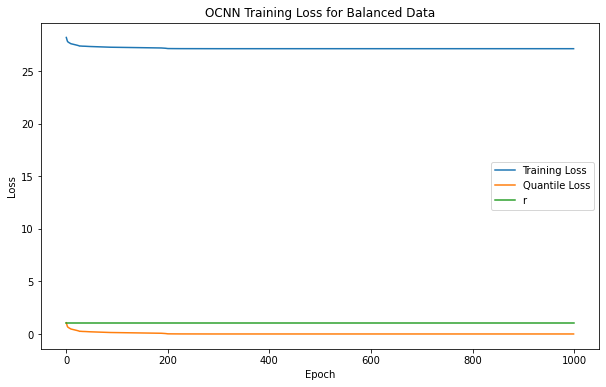

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(history_balanced.epoch, history_balanced.history['loss'], label = 'Training Loss')
plt.plot(history_balanced.epoch, history_balanced.history['quantile_loss'], label = 'Quantile Loss')
plt.plot(history_balanced.epoch, history_balanced.history['r'], label = 'r')
plt.title('OCNN Training Loss for Balanced Data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'center right')
plt.show()

In [0]:
balanced_label_normal = np.array([0]*4000)
balanced_label_anomalous = np.array([1]*4000)
y_true_balanced = np.concatenate([balanced_label_normal, balanced_label_anomalous])

In [0]:
y_pred_balanced = model_balanced.predict(X_val_balanced_scaled)

In [0]:
np.unique(y_pred_balanced)

In [0]:
r = history_balanced.history['r'].pop()

In [0]:
s_n_balanced = [y_pred_balanced[i, 0] - r >= 0 for i in range(len(y_pred_balanced))]

In [0]:
frac_of_outliers_balanced = len([s for s in s_n_balanced if s == 0])/len(s_n_balanced)

In [35]:
frac_of_outliers_balanced

0.6595

In [0]:
fpr_b, tpr_b, thresh_b = roc_curve(y_true_balanced, y_pred_balanced)

In [0]:
roc_auc_balanced = auc(fpr_b, tpr_b)

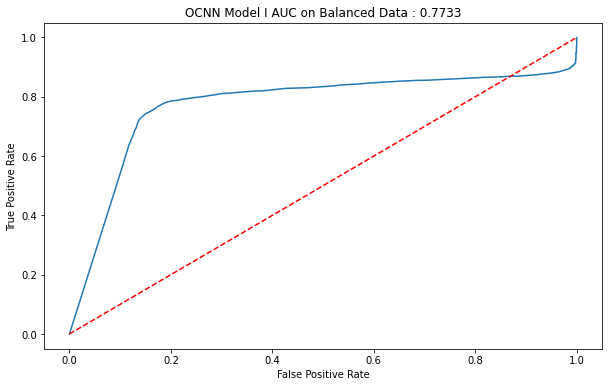

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_b, tpr_b)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OCNN Model I AUC on Balanced Data : %0.4f'%(roc_auc_balanced))
plt.show()

In [0]:
precision_b, recall_b, threshold_b = precision_recall_curve(y_true_balanced, y_pred_balanced)

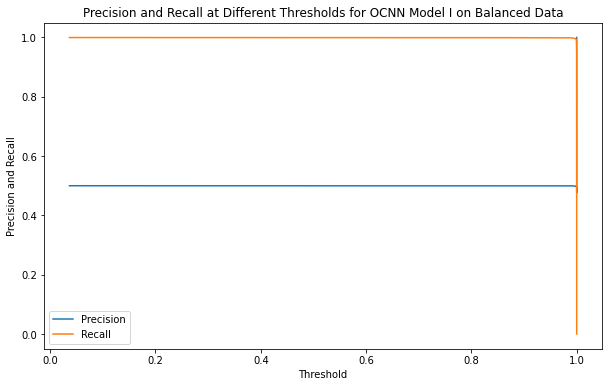

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_b, precision_b[1:], label = 'Precision')
plt.plot(threshold_b, recall_b[1:], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall at Different Thresholds for OCNN Model I on Balanced Data')
plt.legend()
plt.show()

In [0]:
oc_nn = OneClassNeuralNetwork(num_features, num_hidden, r)

In [49]:
model_imbalanced, history_imbalanced = oc_nn.train_model(X_train_scaled, epochs = 1000, nu = nu_imbalanced)

Epoch 1/1000
1/1 [==============================] - 0s 93ms/step - loss: 31.2568 - r: 1.0000 - quantile_loss: 4.6994
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 31.3730 - r: 1.0000 - quantile_loss: 4.8156
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 30.4973 - r: 1.0000 - quantile_loss: 3.9399
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 29.9025 - r: 1.0000 - quantile_loss: 3.3451
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 29.6058 - r: 1.0000 - quantile_loss: 3.0485
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 29.4505 - r: 1.0000 - quantile_loss: 2.8931
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 29.3449 - r: 1.0000 - quantile_loss: 2.7876
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 29.2764 - r: 1.0000 - quantile_loss: 2.7190
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step

In [0]:
imbalanced_label_normal = np.array([0]*4000)
imbalanced_label_anomalous = np.array([1]*500)
y_true_imbalanced = np.concatenate([imbalanced_label_normal, imbalanced_label_anomalous])

In [0]:
y_pred_imbalanced = model_imbalanced.predict(X_val_imbalanced_scaled)

In [52]:
np.unique(y_pred_imbalanced)

array([1.0102987e-05, 6.3388050e-03, 9.2121077e-01, 9.8267245e-01,
       9.9462926e-01, 9.9843460e-01, 9.9843824e-01, 9.9879491e-01,
       9.9889815e-01, 9.9897993e-01, 9.9960136e-01, 9.9962306e-01,
       9.9964148e-01, 9.9975443e-01, 9.9980021e-01, 9.9981445e-01,
       9.9984038e-01, 9.9984729e-01, 9.9986005e-01, 9.9986255e-01,
       9.9987209e-01, 9.9989319e-01, 9.9994934e-01, 9.9995160e-01,
       9.9995959e-01, 9.9996144e-01, 9.9996388e-01, 9.9997008e-01,
       9.9997026e-01, 9.9997532e-01, 9.9997807e-01, 9.9997830e-01,
       9.9997890e-01, 9.9997991e-01, 9.9998039e-01, 9.9998206e-01,
       9.9998248e-01, 9.9998432e-01, 9.9998474e-01, 9.9998593e-01,
       9.9998611e-01, 9.9998617e-01, 9.9998647e-01, 9.9998683e-01,
       9.9998754e-01, 9.9998796e-01, 9.9998868e-01, 9.9998891e-01,
       9.9998951e-01, 9.9998975e-01, 9.9999011e-01, 9.9999058e-01,
       9.9999082e-01, 9.9999094e-01, 9.9999136e-01, 9.9999166e-01,
       9.9999195e-01, 9.9999201e-01, 9.9999213e-01, 9.9999249e

In [0]:
r = history_imbalanced.history['r'].pop()

In [0]:
s_n_imbalanced = [y_pred_imbalanced[i, 0] - r >= 0 for i in range(len(y_pred_imbalanced))]

In [0]:
frac_of_outliers_imbalanced = len([s for s in s_n_imbalanced if s == 0])/len(s_n_imbalanced)

In [56]:
frac_of_outliers_imbalanced

0.7853333333333333

In [0]:
fpr_i, tpr_i, thresh_i = roc_curve(y_true_imbalanced, y_pred_imbalanced)
roc_auc_imbalanced = auc(fpr_i, tpr_i)

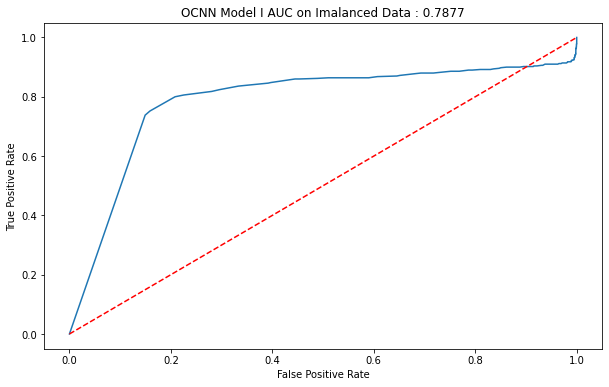

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_i, tpr_i)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OCNN Model I AUC on Imalanced Data : %0.4f'%(roc_auc_imbalanced))
plt.show()

In [0]:
precision_i, recall_i, threshold_i = precision_recall_curve(y_true_imbalanced, y_pred_imbalanced)

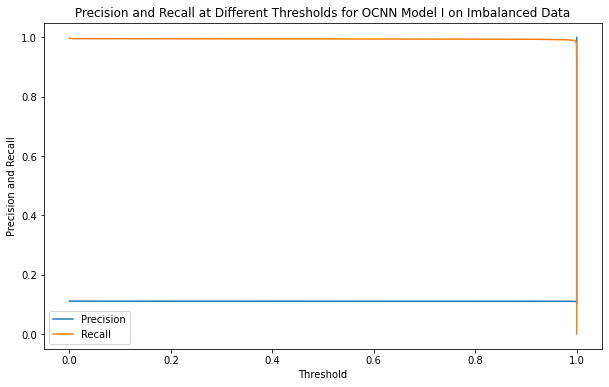

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_i, precision_i[1:], label = 'Precision')
plt.plot(threshold_i, recall_i[1:], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall at Different Thresholds for OCNN Model I on Imbalanced Data')
plt.legend()
plt.show()